# Decision Tree Assignment 1

###  Q1. Describe the decision tree classifier algorithm and how it works to make predictions.

A decision tree classifier recursively splits the dataset based on the best features to create a tree-like structure. Each leaf node represents a class label. When predicting, it traverses the tree to find the appropriate leaf node, which determines the predicted class for the new data point. Decision trees are easy to interpret, handle numerical and categorical data, and perform well on large datasets. However, they can overfit, be sensitive to data variations, and may produce biased trees if some classes dominate the dataset. Pruning, setting a maximum depth, or using ensemble methods can mitigate these issues.


**Example: Classification of Iris Flowers**

Suppose we have a dataset of iris flowers with four features: sepal length, sepal width, petal length, and petal width, and three possible classes: setosa, versicolor, and virginica.

1. Starting at the root node, the decision tree algorithm selects the best feature, say "petal length," to split the data based on a certain criterion (e.g., Gini impurity).

2. The data is split into two branches: one where petal length <= 2.45, and the other where petal length > 2.45.

3. On the left branch (petal length <= 2.45), the algorithm might further split using another feature, say "petal width."

4. This process continues recursively until the stopping criteria are met (e.g., reaching a maximum depth or having a minimum number of samples in a node).

5. Once the tree is built, each leaf node represents a class label. For instance, if a leaf node contains samples of setosa and versicolor, it will be labeled as "versicolor" since it is the majority class.

6. To make a prediction for a new iris flower, the decision tree algorithm traverses the tree from the root node, evaluating the petal length, then possibly petal width, and so on, until it reaches a leaf node. The class label of that leaf node is assigned as the predicted class for the new flower.

In this example, a decision tree classifier is used to classify iris flowers into one of the three classes based on their petal length, petal width, sepal length, and sepal width.

### Q2. Provide a step-by-step explanation of the mathematical intuition behind decision tree classification.



**Step-by-Step Explanation:**

1. **Feature Selection:**
   - Decision trees start by selecting the best feature (F) that splits the dataset into subsets based on a specific criterion, such as Gini impurity or information gain.
   - The goal is to find the feature that maximizes the purity of the subsets or the reduction in uncertainty.

2. **Impurity Measurement:**
   - Gini Impurity: It measures the impurity or disorder in a dataset with K classes. For a node with class probabilities (p_1, p_2, ..., p_K), the Gini impurity (Gini(D)) is calculated as follows:
     ![Gini Impurity Formula](https://latex.codecogs.com/svg.latex?\color{blue}Gini%28D%29%20%3D%201%20-%20%5Csum_%7Bi%3D1%7D%5E%7BK%7D%20%28p_i%29%5E2)
   - Entropy: It quantifies the uncertainty or disorder in a dataset. For a node with class probabilities (p_1, p_2, ..., p_K), the entropy (Ent(D)) is calculated as follows:
     ![Entropy Formula](https://latex.codecogs.com/svg.latex?\color{blue}Ent%28D%29%20%3D%20-%20%5Csum_%7Bi%3D1%7D%5E%7BK%7D%20p_i%20%5Clog_2%20p_i)

3. **Splitting Criteria:**
   - Information Gain: It measures the reduction in entropy achieved by splitting the dataset based on the selected feature F. For a node N, the information gain (IG(N, F)) is calculated as follows:
     ![Information Gain Formula](https://latex.codecogs.com/svg.latex?\color{blue}IG%28N%2C%20F%29%20%3D%20Ent%28N%29%20-%20%5Csum_%7Bf%20%5Cin%20F%7D%20%5Cfrac%7B%7C%20N_f%20%7C%7D%7B%7C%20N%20%7C%7D%20%5Ccdot%20Ent%28N_f%29)

4. **Recursive Splitting:**
   - The algorithm recursively applies feature selection and splitting to each subset created by the split until a stopping criterion is met. This process builds the decision tree by branching into nodes and leaves.

5. **Leaf Node Labeling:**
   - At each leaf node, the decision tree assigns a class label based on the majority class of the samples in that node. If all samples belong to the same class, the node becomes a pure leaf and represents a definite class label.

6. **Predictions:**
   - To predict the class label for a new data point, the decision tree follows the path from the root node down to a specific leaf node based on the feature values of the new data.
   - At each internal node, the algorithm compares the feature value of the new data with the threshold determined during training and decides which branch to take based on the splitting criterion learned during training.

7. **Handling Overfitting:**
   - Decision trees have a tendency to overfit the training data. To prevent overfitting, techniques like tree pruning (removing branches), setting a maximum tree depth, or using ensemble methods (e.g., Random Forest) are employed.

In conclusion, decision tree classification relies on mathematical principles like Gini impurity and entropy to make optimal splits based on the selected features. By recursively creating decision boundaries in the feature space, the decision tree algorithm forms a tree-like structure, providing interpretable and powerful models for classification tasks in various domains.

### Q3. Explain how a decision tree classifier can be used to solve a binary classification problem.

In [1]:
import pandas as pd
df=pd.read_csv('diabetes.csv')

## Importing neccesary libraries
## Making dataframe
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [2]:
## train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [3]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [4]:
parameter = {
    "criterion": ['gini', 'entropy', 'log_loss'],
    "splitter" : ['best', 'random'],
    "max_depth" : [1,2,3,4,5],
    "max_features" : ['auto', 'sqrt', 'log2']
}


In [5]:
from sklearn.model_selection import GridSearchCV
classifier=GridSearchCV(clf,param_grid=parameter,scoring='accuracy')

In [8]:
import warnings
warnings.filterwarnings('ignore')
classifier.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [10]:
y_pred=classifier.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7047244094488189

#### The above example uses Decision Tree Classifier for Binary Classification Problem. The steps involved are as follows:
1. Import necessary libraries
2. Split the Train test data
3. Make an object for DecisionTreeClassifier
4. Make a dictionary of parameters to select the best ones
5. Use GridSearch to select the best parameters
6. Finally, fit the train data into the classifier with best parameters.
7. Predict the test data. 

### Q4. Discuss the geometric intuition behind decision tree classification and how it can be used to make predictions.

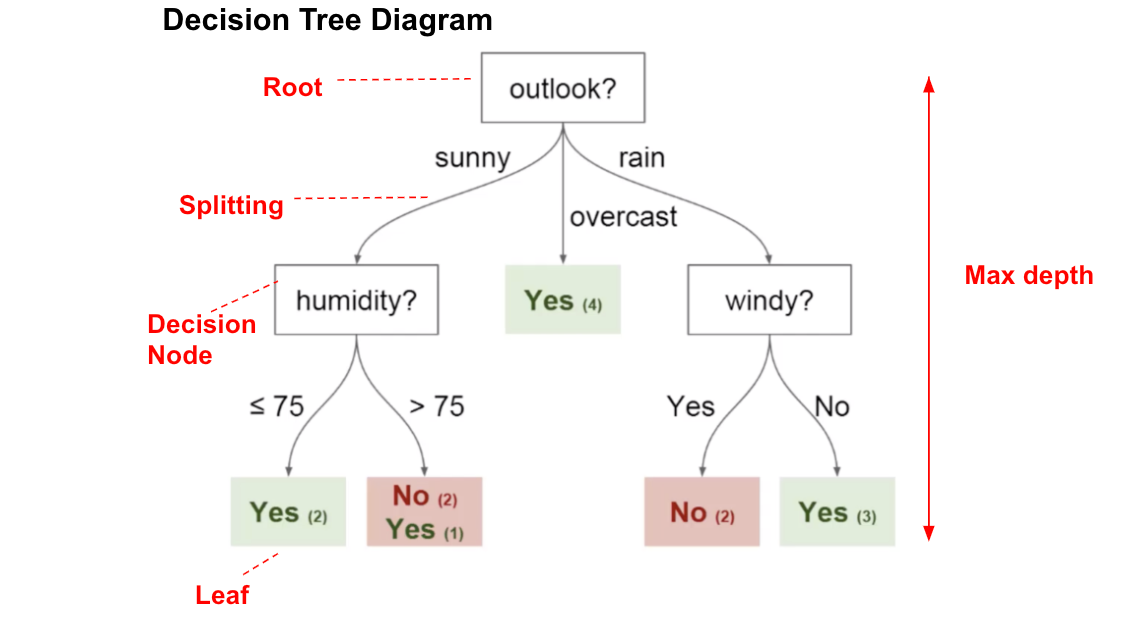

the geometric intuition behind decision tree classification in simpler terms:

1. **Imagine a Map**: Think of the feature space as a map with many locations, and each location has different characteristics represented by various features (like sunny, rain, overcast, etc.).

2. **Divide the Map**: A decision tree tries to divide this map into different regions based on the feature values. It looks for features and values that best split the locations into distinct groups, like drawing boundaries on the map.

3. **Recursive Path**: The process of drawing boundaries is done step-by-step in a recursive way. At each step, the decision tree asks a question about a specific feature . Based on the answer, it moves along a certain path on the map to a new question.

4. **Arriving at a Prediction**: This process continues until it reaches a final boundary or region on the map. The decision tree assigns a specific class label (like "Sunny" or "Rainy") to that region. So, each region on the map is associated with a particular class.

5. **Predicting New Locations**: To predict the class of a new location (a new set of feature values), the decision tree starts at the top and follows the path based on the feature values. It keeps moving along the branches until it arrives at a region, and then it assigns the class of that region to the new location.

6. **Interpretability**: The great thing about decision trees is that you can easily understand how the map is divided and how predictions are made. The boundaries are simple, straight lines (or planes in higher dimensions), making the decision process very interpretable.

So, the geometric intuition is like drawing lines on a map to divide it into different regions, each associated with a specific class. Then, when a new location comes along, you just follow the lines on the map to determine which class it belongs to. That's how decision tree classification works!

### Q5. Define the confusion matrix and describe how it can be used to evaluate the performance of a classification model.

The confusion matrix is a performance evaluation tool used in the field of machine learning for assessing the performance of a classification model. It provides a comprehensive summary of the model's predictions by comparing them to the actual labels of the data. The confusion matrix is particularly useful when dealing with binary classification problems (two classes) but can be extended to multi-class problems as well.

The confusion matrix is typically presented in a tabular format with four key elements:

1. **True Positives (TP)**: The number of instances that were correctly predicted as positive (correctly classified as the positive class).

2. **True Negatives (TN)**: The number of instances that were correctly predicted as negative (correctly classified as the negative class).

3. **False Positives (FP)**: The number of instances that were incorrectly predicted as positive but actually belong to the negative class (misclassified as the positive class).

4. **False Negatives (FN)**: The number of instances that were incorrectly predicted as negative but actually belong to the positive class (misclassified as the negative class).

Here's how the confusion matrix looks:

```
                  Predicted Positive    Predicted Negative
Actual Positive        TP                    FN
Actual Negative        FP                    TN
```

Now, let's discuss how the confusion matrix can be used to evaluate the performance of a classification model:

1. **Accuracy**: Overall model performance can be measured using accuracy, which is the proportion of correct predictions (both true positives and true negatives) out of the total number of instances. It is computed as (TP + TN) / (TP + TN + FP + FN). However, accuracy alone might not be sufficient when dealing with imbalanced datasets.

2. **Precision**: Precision measures the proportion of true positive predictions out of all positive predictions made by the model. It quantifies the model's ability to avoid false positives and is computed as TP / (TP + FP).

3. **Recall (Sensitivity or True Positive Rate)**: Recall measures the proportion of true positive predictions out of all actual positive instances in the dataset. It quantifies the model's ability to avoid false negatives and is computed as TP / (TP + FN).

4. **Specificity (True Negative Rate)**: Specificity measures the proportion of true negative predictions out of all actual negative instances in the dataset. It quantifies the model's ability to avoid false positives in the negative class and is computed as TN / (TN + FP).

5. **F1 Score**: The F1 score is the harmonic mean of precision and recall and is often used when you need to balance precision and recall. It is computed as 2 * (Precision * Recall) / (Precision + Recall).

By examining the confusion matrix and these evaluation metrics, you can gain a more comprehensive understanding of your model's performance, identify areas of improvement, and choose the appropriate threshold for classification if necessary. It allows you to make informed decisions regarding the model's deployment and potential adjustments to enhance its effectiveness.

### Q6. Provide an example of a confusion matrix and explain how precision, recall, and F1 score can be calculated from it.

Below mentioned isa binary classification example where we have a model that predicts whether emails are spam or not spam (ham). We have a test dataset with 100 email examples. After running the model on the test dataset, we get the following confusion matrix:

```
                Predicted Spam    Predicted Ham
Actual Spam         30                10
Actual Ham           5                55
```

**Precision**:
Precision measures how many of the predicted spam emails are actually spam. To calculate precision, you use the True Positives (TP) and False Positives (FP) from the confusion matrix:

Precision = TP / (TP + FP) = 30 / (30 + 5) = 30 / 35 ≈ 0.857

So, the precision is approximately 0.857 or 85.7%. It means that out of all the emails the model predicted as spam, around 85.7% are actually spam.

**Recall (Sensitivity)**:
Recall measures how many of the actual spam emails were correctly identified by the model. To calculate recall, you use the True Positives (TP) and False Negatives (FN) from the confusion matrix:

Recall = TP / (TP + FN) = 30 / (30 + 10) = 30 / 40 = 0.75

The recall is 0.75 or 75%. It means that the model identified 75% of the actual spam emails correctly.

**F1 Score**:
The F1 score is a balanced metric that considers both precision and recall. It is the harmonic mean of precision and recall and is useful when you need to balance these two aspects. To calculate the F1 score, you use the precision and recall values:

F1 Score = 2 * (Precision * Recall) / (Precision + Recall) = 2 * (0.857 * 0.75) / (0.857 + 0.75) ≈ 0.800

The F1 score is approximately 0.800 or 80%. It provides a single measure that takes into account both precision and recall, making it useful when you want a balanced evaluation of the model's performance.

In this example, the model has decent precision, recall, and F1 score, indicating that it is reasonably good at classifying emails as spam or ham. However, the specific thresholds for what is considered good or bad may vary depending on the application and the model's requirements.

### Q7. Discuss the importance of choosing an appropriate evaluation metric for a classification problem and explain how this can be done.

#### To consider the following points while choosing the evaluation metrics is really import:
1. **Use Precision when the False positive is important.** When we have to  reduce the false positive.  Example: When detecting spam emails. Incase if a email was not actually a spam but the system detects it as spam it may happen that the email was actauuly very important and the person won't check the spam section in the mail. This will cause a great blunder. In this case it is important to reduce false positive.

2. **Use Recall in case when False Negative is important.** When we have to reduce the false negative. Example: For Diabetes prediction, if a person has diabetes but the model detects it as NO DIABETES. It will cause a blunder because the person has diabetes and he won't go for medication because of models wrong prediction, In such cases we need to reduce False Positive.

3. **Use F-Beta Score when False Positive and False Negative both are important to be considered.** It combines precision and recall using the harmonic mean, providing a single value that considers both aspects.Using the F1 score is beneficial when you need a balanced evaluation of the model's performance and cannot prioritize either false positives or false negatives. It helps you strike a balance between precision and recall, and it is useful when you want a single metric to compare models or make decisions.

### Q8. Provide an example of a classification problem where precision is the most important metric, and explain why.

In a medical diagnostic scenario for a rare and highly contagious disease (X-Disease), precision is the most important metric. With a disease prevalence of 0.1%, false positives (healthy individuals misclassified as having the disease) must be minimized to avoid unnecessary stress and medical interventions. Precision focuses on true positives and false positives, ensuring that when the model predicts the disease, it is highly accurate. High precision provides trustworthy predictions, reducing the risk of delayed diagnosis and further spread of the disease. Emphasizing precision helps prioritize patient well-being and ensures the appropriate allocation of medical resources.

### Q9. Provide an example of a classification problem where recall is the most important metric, and explain why.

**Example**: Credit card fraud detection system.

**Importance of Recall**: Minimize false negatives (FN) to detect fraudulent transactions promptly.

**Using Recall**: Measures the proportion of correctly predicted fraud cases among all actual fraud cases.

**Optimizing for High Recall**: Aim to identify as many fraudulent transactions as possible, even if it means more false positives.

**Conclusion**: In fraud detection, recall is crucial as it prioritizes reducing false negatives, promptly identifying and preventing fraudulent activities to protect customers and financial institutions.

## The End